# Task 4.1

Load the dataset. Explore the dataset using pandas methods such as head(), info(), and describe().

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/column_2C_weka.csv", delimiter=',')
print(dataset.describe())
print()
print(dataset.head(5))
print()
print(dataset.info())

column_names = dataset.columns

print(column_names)

       pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196           

# Task 4.2

Import the necessary libraries

In [ ]:
# For data creation and other tasks
import numpy as np
import random
import pandas as pd

## Mertics to evaluate the models
from sklearn . metrics import accuracy_score # for Logistic Regression

# For plotting the graphs
import matplotlib . pyplot as plt
%matplotlib inline
import seaborn as sns

# For spliting the data into 80:20 ratio
from sklearn . model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Task 4.3

Initialize weights and bias as 0:

In [ ]:
def weightInitialization(num_features):
    # w = np.full((num_features, 1), 2)
    w = np.zeros((num_features, 1))
    b = 0.0
    return w, b

num_features = dataset.shape[1]-1  # excluding the last column: which is the label (not a feature, rather a class)

w, b = weightInitialization(num_features)   # Initialize weights and bias

print(w)
print(b)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0.0


# Task 4.4

Sigmoid Function:

In [ ]:
# The sigmoid activation
def sigmoid_activation(z):
    y = 1 / (1 + np.exp(-z))
    return y

# Task 4.5

Model Optimization Function:

In [ ]:
def model_optimize(w, b, X, Y):
    # 1. Get the number of data points (number of samples)
    m = X.shape[1]

    z = np.dot(w.T, X) + b

    # 2. Get the prediction (activation) by applying the sigmoid function
    A = sigmoid_activation(z)

    # 3. Calculate the cost (loss) using the cross-entropy loss for logistic regression
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # 4. Calculate the gradients (derivatives) of the cost with respect to weights and bias
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    # Create a dictionary to store gradients and cost
    grads = {"dw": dw, "db": db}

    return grads, cost


# # Call the model_optimize function
# grads, cost = model_optimize(w, b, X, y)

# # Print the results
# print("Gradients (dw):", grads["dw"])
# print("Gradient (db):", grads["db"])
# print("Cost:", cost)


# Task 4.6

Model Optimization: Run the optimization function for a given number of epochs and get the final weights along with a list of cost for each epoch

In [ ]:
def model_fit(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Update the weights using gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if (i % 10 == 0):
            costs.append(cost)
            # Print the cost if needed: print("Cost after %i iteration is %f" % (i, cost))

    # Final parameters (weights and bias)
    coeff = {"w": w, "b": b}
    return coeff, costs

# # Define initial values
# learning_rate = 0.01
# no_iterations = 100

# # Call the model_fit function
# coeff, costs = model_fit(w, b, X_T, y, learning_rate, no_iterations)

# # Print the final weights and bias
# print("Final Weights (w):", coeff["w"])
# print("Final Bias (b):", coeff["b"])



# Task 4.7

Use logistic regression for the dataset

In [ ]:
# Extract features (X) and labels (y)
X = dataset.iloc[:, :-1]  # Select all columns except the last one as features
y = dataset.iloc[:, -1].map({"Normal": 0, "Abnormal": 1})  # Select the last column as the label

# Convert X and Y to a NumPy array
X = X.values
y = y.values

# Normalize
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

# Step 2: Model Training
num_features = X_train.shape[1]  # Number of features
w, b = weightInitialization(num_features)  # Initialize weights and bias
learning_rate = 0.01  # Set your learning rate
no_iterations = 1000  # Set the number of iterations

coeff, costs = model_fit(w, b, X_train.T, y_train, learning_rate, no_iterations)

# Step 3: Get Predictions for the test dataset
w_optimized = coeff["w"]
b_optimized = coeff["b"]

# Predict using the optimized weights and bias
z = np.dot(w_optimized.T, X_test.T) + b_optimized        # computing z
final_test_pred = sigmoid_activation(z)     # Use the computed 'z' values

final_test_pred = (final_test_pred > 0.5).astype(int)

# Step 4: Calculate Accuracy
accuracy = accuracy_score(y_test.T, final_test_pred.T)
print("Test Accuracy:", accuracy * 100, "%")

Test Accuracy: 74.19354838709677 %


# Task 4.8
Plot the cost for each epoch: Use the costs list to plot the cost vs. epoch curve.

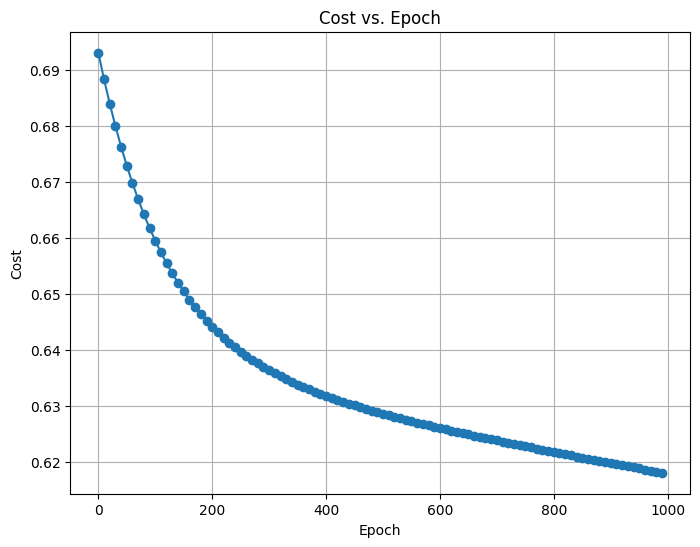

In [ ]:
# Create a list of epoch numbers
epochs = list(range(0, len(costs) * 10, 10))

# Plot the cost vs. epoch curve
plt.figure(figsize=(8, 6))
plt.plot(epochs, costs, marker='o', linestyle='-')
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


# Task 4.9
Use smaller portion of training data: Show how the accuracy of the test dataset changes when you use 10%, 20%, and so on of the training dataset.

In [ ]:
# Step 1: Split the data into training and testing sets
for test_size in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size/100, random_state=42)
    y_train = y_train.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

    # Step 2: Model Training
    num_features = X_train.shape[1]  # Number of features
    w, b = weightInitialization(num_features)  # Initialize weights and bias
    learning_rate = 0.01  # Set your learning rate
    no_iterations = 1000  # Set the number of iterations

    coeff, costs = model_fit(w, b, X_train.T, y_train, learning_rate, no_iterations)

    # Step 3: Get Predictions for the test dataset
    w_optimized = coeff["w"]
    b_optimized = coeff["b"]

    # Predict using the optimized weights and bias
    z = np.dot(w_optimized.T, X_test.T) + b_optimized        # computing z
    final_test_pred = sigmoid_activation(z)     # Use the computed 'z' values

    final_test_pred = (final_test_pred > 0.5).astype(int)

    # Step 4: Calculate Accuracy
    accuracy = accuracy_score(y_test.T, final_test_pred.T)

    # Print the accuracy score for the current test_size
    print(f"Test Accuracy for test_size={test_size}%: {accuracy * 100:.2f}%")


Test Accuracy for test_size=1%: 75.00%
Test Accuracy for test_size=2%: 85.71%
Test Accuracy for test_size=3%: 80.00%
Test Accuracy for test_size=4%: 76.92%
Test Accuracy for test_size=5%: 62.50%
Test Accuracy for test_size=6%: 68.42%
Test Accuracy for test_size=7%: 72.73%
Test Accuracy for test_size=8%: 76.00%
Test Accuracy for test_size=9%: 78.57%
Test Accuracy for test_size=10%: 74.19%
Test Accuracy for test_size=11%: 74.29%
Test Accuracy for test_size=12%: 76.32%
Test Accuracy for test_size=13%: 78.05%
Test Accuracy for test_size=14%: 77.27%
Test Accuracy for test_size=15%: 74.47%
Test Accuracy for test_size=16%: 74.00%
Test Accuracy for test_size=17%: 73.58%
Test Accuracy for test_size=18%: 73.21%
Test Accuracy for test_size=19%: 72.88%
Test Accuracy for test_size=20%: 70.97%
Test Accuracy for test_size=21%: 69.70%
Test Accuracy for test_size=22%: 71.01%
Test Accuracy for test_size=23%: 72.22%
Test Accuracy for test_size=24%: 73.33%
Test Accuracy for test_size=25%: 73.08%
Test Accu

# Task 4.10
L1 L2 Regularization: Adapt the function model_optimize to include regularization.

In [ ]:
def model_optimize_with_regularization(w, b, X, Y, reg=None, lambda_reg=0.1):
    # 1. Get the number of data points (number of samples)
    m = X.shape[1]

    z = np.dot(w.T, X) + b        # computing z

    # 2. Get the prediction (activation) by applying the sigmoid function
    A = sigmoid_activation(z)

    # 3. Calculate the cost (loss) depending on the regularization type (reg)
    if reg == "L1":
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + lambda_reg/(2*m) * np.sum(np.abs(w))
    elif reg == "L2":
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + lambda_reg/(2*m) * np.sum(w**2)
    else:
        cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # 4. Calculate the gradients (derivatives) of the cost with respect to weights and bias
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    # Apply regularization to gradients if necessary
    if reg == "L1":
        dw += (lambda_reg / m) * np.sign(w)
    elif reg == "L2":
        dw += (lambda_reg / m) * w

    # Create a dictionary to store gradients and cost
    grads = {"dw": dw, "db": db}

    return grads, cost


# Task 4.11
Accuracy change with regularization :

Train the model for different epochs, different regularization (none, L1, L2) and different regularization coefficient values then show the test accuracies found in a table.

In [ ]:
def model_fit_with_regularization(w, b, X, Y, reg, lambda_reg, no_iterations):
    costs = []

    for i in range(no_iterations):
        grads, cost = model_optimize_with_regularization(w, b, X, Y, reg, lambda_reg)
        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 10 == 0:
            costs.append(cost)

    coeff = {"w": w, "b": b}

    return coeff, costs

# Define a range of regularization coefficient values
lambda_values = [0.001, 0.01, 0.1, 1.0]

# Define a range of iteration values
iteration_values = [100, 500, 1000, 2000]

# Create an empty list to store results DataFrames
results_dataframes = []

# Loop through regularization types, lambda values, and iteration values
for reg_type in ["None", "L1", "L2"]:
    for lambda_reg in lambda_values:
        for no_iterations in iteration_values:
            # Initialize weights and bias
            num_features = X_train.shape[1]
            w, b = weightInitialization(num_features)

            # Train the model with regularization
            if reg_type == "None":
                reg_type_display = "No Regularization"
            elif reg_type == "L1":
                reg_type_display = "L1 Regularization"
            else:
                reg_type_display = "L2 Regularization"

            # Train the model with the current regularization type, lambda value, and iterations
            coeff, _ = model_fit_with_regularization(w, b, X_train.T, y_train, reg_type, lambda_reg, no_iterations)

            # Get optimized weights and bias
            w_optimized = coeff["w"]
            b_optimized = coeff["b"]

            # Calculate test predictions
            z = np.dot(w_optimized.T, X_test.T) + b_optimized
            final_test_pred = sigmoid_activation(z)
            final_test_pred = (final_test_pred > 0.5).astype(int)

            # Calculate test accuracy
            test_accuracy = accuracy_score(y_test.T, final_test_pred.T)

            # Create a DataFrame for the current result
            result_df = pd.DataFrame({
                "Regularization Type": [reg_type_display],
                "Lambda": [lambda_reg],
                "Iterations": [no_iterations],
                "Test Accuracy": [test_accuracy]
            })

            # Append the DataFrame to the list of results DataFrames
            results_dataframes.append(result_df)


# Concatenate all result DataFrames into a single results table
results_table = pd.concat(results_dataframes, ignore_index=True)

# Display the results table
print(results_table)

   Regularization Type  Lambda  Iterations  Test Accuracy
0    No Regularization   0.001         100       0.677524
1    No Regularization   0.001         500       0.677524
2    No Regularization   0.001        1000       0.677524
3    No Regularization   0.001        2000       0.677524
4    No Regularization   0.010         100       0.677524
5    No Regularization   0.010         500       0.677524
6    No Regularization   0.010        1000       0.677524
7    No Regularization   0.010        2000       0.677524
8    No Regularization   0.100         100       0.677524
9    No Regularization   0.100         500       0.677524
10   No Regularization   0.100        1000       0.677524
11   No Regularization   0.100        2000       0.677524
12   No Regularization   1.000         100       0.677524
13   No Regularization   1.000         500       0.677524
14   No Regularization   1.000        1000       0.677524
15   No Regularization   1.000        2000       0.677524
16   L1 Regula

# Task 4.12

Logistic Regression Class from sklearn library:

Use the Logistic Regression model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Train the Logistic Regression model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the Logistic Regression model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Model Accuracy:", accuracy * 100, "%")

Logistic Regression Model Accuracy: 79.56989247311827 %


# Task 4.13

Decision Trees from sklearn library:

Use the Decision Tree model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy * 100, "%")


Decision Tree Accuracy: 80.64516129032258 %


# Task 4.14

Naive Bayes from sklearn library:

Use the Naive Bayes model from the sklearn library and find the accuracy after
training.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy * 100, "%")

Naive Bayes Accuracy: 79.56989247311827 %
